Industrial melanism
(Carbonaria, Typica and Insularia)
Three alleles (C,I,T)
suppose we've captured n moths and we do not know the genotype of each moth expect for Typica moths

Observed
X = (n_Car, n_Typ, n_Ins)

Unobserved
Y = n_CC, n_CI, n_CT, n_II, n_TI, n_TT

Relationship between genotypes
n_Car = n_CC + 
n_Typ =
n_Ins

Parameters of interest
theta = p_C, p_I, p_T
but we know that theta = 1

1. Expecatation step

Figure out complete data likelihood which is a connditional likelihood
with respect to unobserved data which is the most probable phenotype counts  given the latest frequency counts

2. maximisation step

Since we obtained the expected number of each phenotype, estimating allele frequencies is simply the ratio between number of allele C present in the population and total number of alleles

In [7]:
def e_step(n_car, n_ins, n_typ, p_C, p_I, p_T):
    
    CC_prob = p_C*p_C
    CI_prob = 2*p_C*p_I
    CT_prob = 2*p_C*p_T
    
    II_prob = p_I*p_I
    IT_prob = 2*p_I*p_T

    TT_prob = p_T*p_T
    
    C_prob = CC_prob + CI_prob + CT_prob
    I_prob = II_prob + IT_prob + CI_prob
    T_prob = TT_prob + IT_prob + CT_prob
    
    n_CC = n_car * CC_prob/C_prob
    n_CI = n_car * CI_prob/C_prob
    n_CT = n_car * CT_prob/C_prob
    n_II = n_ins * II_prob/I_prob
    n_IT = n_ins * IT_prob/I_prob
    n_TT = n_typ
    
    return (n_CC, n_CI, n_CT, n_II, n_IT, n_TT)
   # Given observed information
n_car = 85
n_ins = 196
n_typ = 341
n = n_car + n_ins + n_typ 

def m_step(n, n_CC, n_CI, n_CT, n_II, n_IT, n_TT):
    
    p_C = (2*n_CC + n_CI + n_CT)/(2*n)
    p_I = (2*n_II + n_IT + n_CI)/(2*n)
    p_T = 1 - p_C - p_I
    
    return (p_C, p_I, p_T)


# Initialize
p_C = 1/3
p_I = 1/3
p_T = 1/3

# Record history for visualization
hist = []
hist.append([p_C, p_I, p_T])



In [8]:
for i in range(10):
    # E-step
    n_CC, n_CI, n_CT, n_II, n_IT, n_TT = e_step(n_car, n_ins, n_typ, p_C, p_I, p_T)
    
    # M-step
    p_C, p_I, p_T = m_step(n, n_CC, n_CI, n_CT, n_II, n_IT, n_TT)
    
    hist.append([p_C, p_I, p_T])



In [3]:
pip -V

pip 21.2.4 from /home/ssenkaali/miniconda3/envs/joachim1_pythonclass/lib/python3.10/site-packages/pip (python 3.10)
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib


     |████████████████████████████████| 11.9 MB 127 kB/s eta 0:00:01
     |████████████████████████████████| 3.2 MB 227 kB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 3.6 kB/s eta 0:00:01
     |████████████████████████████████| 944 kB 766 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


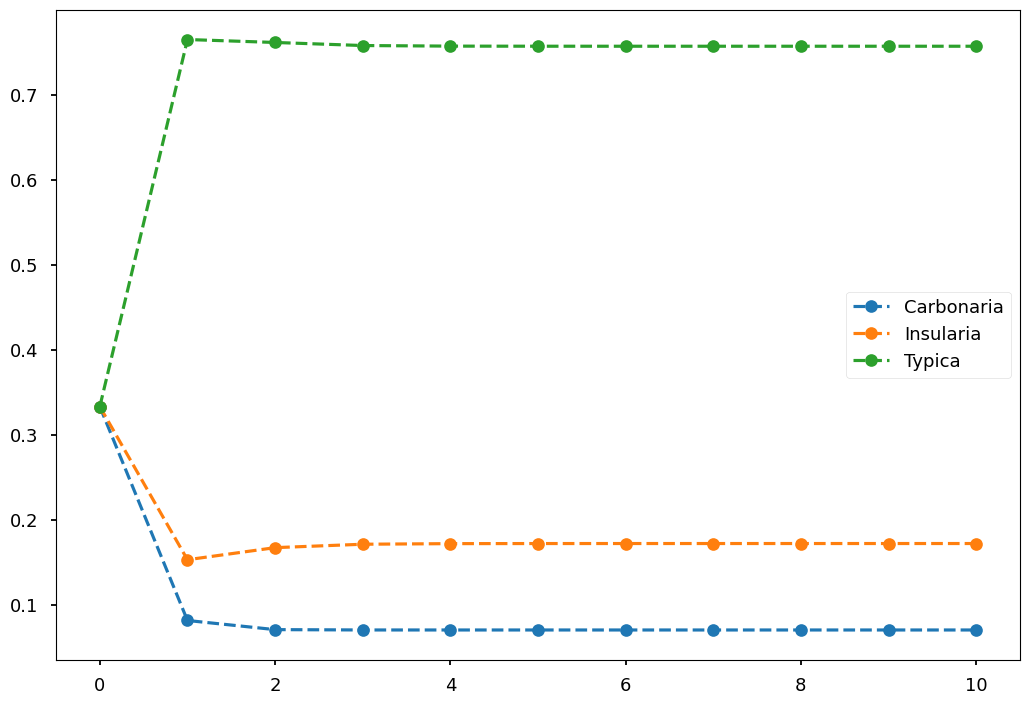

In [10]:

with plt.style.context('seaborn-talk'):
    plt.plot(hist, 'o--')
    plt.legend(['Carbonaria', 'Insularia', 'Typica'])
    plt.tight_layout()